In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 2.7MB/s 


In [0]:
link = 'https://drive.google.com/open?id=1wpN7ltr-UZE3RlBsWlAJxl0lhRMcMl2j' # The shareable link

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('IBM Employee Data.csv')

1wpN7ltr-UZE3RlBsWlAJxl0lhRMcMl2j


In [0]:
import pandas as pd
from pandas import Series,DataFrame
%pylab inline
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# **Reading the file**

In [0]:
df_ibm = pd.read_csv('/content/IBM Employee Data.csv')
df_ibm.head(2)
df_ibm['Attrition'].value_counts()



# df_ibm['Age'] = df_ibm['Age'].astype(int)
# df_ibm['DistanceFromHome'] = df_ibm['DistanceFromHome'].astype(int)
# df_ibm['EmployeeCount'] = df_ibm['EmployeeCount'].astype(int)
# df_ibm['MonthlyIncome'] = df_ibm['MonthlyIncome'].astype(int)
# df_ibm['YearsAtCompany'] = df_ibm['YearsAtCompany'].astype(int)
# df_ibm['YearsWithCurrManager'] = df_ibm['YearsWithCurrManager'].astype(int)
# df_ibm['TotalWorkingYears'] = df_ibm['TotalWorkingYears'].astype(int)
# df_ibm['YearsSinceLastPromotion'] = df_ibm['YearsSinceLastPromotion'].astype(int)
# df_ibm['HourlyRate'] = df_ibm['HourlyRate'].astype(int)
# df_ibm['JobLevel'] = df_ibm['JobLevel'].astype(int)
# df_ibm['NumCompaniesWorked'] = df_ibm['NumCompaniesWorked'].astype(int)
# df_ibm['PercentSalaryHike'] = df_ibm['PercentSalaryHike'].astype(int)
# df_ibm['WorkLifeBalance'] = df_ibm['WorkLifeBalance'].astype(int)



No     1233
Yes     237
Name: Attrition, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import random
from patsy import dmatrices
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt     


# Converting the Attrition field to binary

In [0]:
def getbinary(s):
    if s == 'No':
        return 0
    else:
        return 1

df_ibm['Attrition'] = df_ibm['Attrition'].map(getbinary)


print (df_ibm['Attrition'].value_counts())

0    1233
1     237
Name: Attrition, dtype: int64


# **Creating dummies for Categorical Variables**

In [0]:
df_dummies = pd.get_dummies(df_ibm,columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18',
                                             'OverTime'])
print (df_dummies.shape)
print (df_ibm.shape)

print (df_dummies.head(2))

(1470, 56)
(1470, 35)
   Age  Attrition  DailyRate  ...  Over18_Y  OverTime_No  OverTime_Yes
0   41          1       1102  ...         1            0             1
1   49          0        279  ...         1            1             0

[2 rows x 56 columns]


# **Making the test and train splits**

In [0]:
random.seed(21)

#formula = 'Attrition ~ 0+' + ' + '.join(['Q("'+x+'")' for x in (df_ibm.columns.values.tolist()[:1]+df_ibm.columns.values.tolist()[2:])])

formula = 'Attrition ~ 0+ Q("Age") +Q("EmployeeNumber") + Q("BusinessTravel") + Q("Department") + Q("EducationField") + Q("EnvironmentSatisfaction") + Q("Gender") + Q("JobInvolvement") + Q("JobLevel") + Q("JobRole") + Q("JobSatisfaction") + Q("MaritalStatus") + Q("MonthlyIncome")  + Q("NumCompaniesWorked")  + Q("OverTime") + Q("PercentSalaryHike") + Q("RelationshipSatisfaction")  + Q("TotalWorkingYears") + Q("TrainingTimesLastYear") + Q("WorkLifeBalance")'
print (formula)

Y, Xnew = dmatrices(formula, df_ibm, return_type='dataframe')
y = Y['Attrition'].values





X_train, X_test_new, y_train, y_test = train_test_split(Xnew, y, test_size=0.20,random_state = 1)


X_test = X_test_new.drop('Q("EmployeeNumber")'	, 1)
X_train = X_train.drop('Q("EmployeeNumber")'	, 1)


print (X_train.shape)
print (X_test.shape)
print (y_train.shape)

print (X_train.head(2))
print (y_train)

print (Xnew.head(2))

Attrition ~ 0+ Q("Age") +Q("EmployeeNumber") + Q("BusinessTravel") + Q("Department") + Q("EducationField") + Q("EnvironmentSatisfaction") + Q("Gender") + Q("JobInvolvement") + Q("JobLevel") + Q("JobRole") + Q("JobSatisfaction") + Q("MaritalStatus") + Q("MonthlyIncome")  + Q("NumCompaniesWorked")  + Q("OverTime") + Q("PercentSalaryHike") + Q("RelationshipSatisfaction")  + Q("TotalWorkingYears") + Q("TrainingTimesLastYear") + Q("WorkLifeBalance")
(1176, 34)
(294, 34)
(1176,)
     Q("BusinessTravel")[Non-Travel]  ...  Q("WorkLifeBalance")
163                              0.0  ...                   1.0
47                               0.0  ...                   3.0

[2 rows x 34 columns]
[0. 0. 1. ... 0. 0. 0.]
   Q("BusinessTravel")[Non-Travel]  ...  Q("WorkLifeBalance")
0                              0.0  ...                   1.0
1                              0.0  ...                   3.0

[2 rows x 35 columns]


# **Oversampling the train data using SMOTE**

In [0]:
sm  = SMOTE(random_state = 2)

X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train.ravel())

print (X_train.shape)
print (y_train.shape)

print (X_train_smote.shape)
print (y_train_smote.shape)

print (sum(y_train_smote))
print (len(y_train_smote))

print (X_train.head(2))

(1176, 34)
(1176,)
(1994, 34)
(1994,)
997.0
1994
     Q("BusinessTravel")[Non-Travel]  ...  Q("WorkLifeBalance")
163                              0.0  ...                   1.0
47                               0.0  ...                   3.0

[2 rows x 34 columns]


# **Implementing Logistic Regression**

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7808425275827482
              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78       997
         1.0       0.78      0.78      0.78       997

    accuracy                           0.78      1994
   macro avg       0.78      0.78      0.78      1994
weighted avg       0.78      0.78      0.78      1994

test starts here
0.7380952380952381
              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82       236
         1.0       0.41      0.74      0.53        58

    accuracy                           0.74       294
   macro avg       0.67      0.74      0.67       294
weighted avg       0.82      0.74      0.76       294

0.739333722969024
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


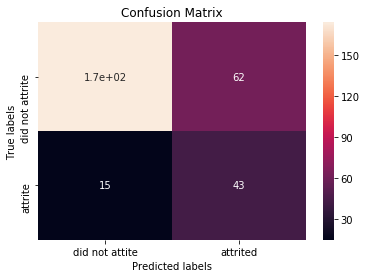

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


## USING SMOTE DATA
result = model.fit(X_train_smote, y_train_smote)
prediction_train = model.predict(X_train_smote)
print (metrics.accuracy_score(y_train_smote, prediction_train))
print (metrics.classification_report(y_train_smote,prediction_train))

print('test starts here')

prediction = model.predict(X_test)

all_prediction = model.predict_proba(X_test)[:,1]

print (metrics.accuracy_score(y_test, prediction))
print( metrics.classification_report(y_test,prediction))
print(metrics.roc_auc_score(y_test, prediction,sample_weight=None, max_fpr=None))



# CONFUSION MATRIX

cm= metrics.confusion_matrix(y_test,prediction)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['did not attite', 'attrited']); ax.yaxis.set_ticklabels(['did not attrite', 'attrite'])



print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
# ## USING NORMAL DATA

# result = model.fit(X_train, y_train)
# prediction_train = model.predict(X_train)
# print (metrics.accuracy_score(y_train, prediction_train))
# print (metrics.classification_report(y_train,prediction_train))

# print('test starts here')


# prediction = model.predict(X_test)
# print (metrics.accuracy_score(y_test, prediction))
# print (metrics.classification_report(y_test,prediction))
# print (metrics.confusion_matrix(prediction,y_test))



# weights = Series(model.coef_[0],
#                  index=X.columns.values)
# weights.sort_values()


# print(metrics.roc_auc_score(y_test, prediction,sample_weight=None, max_fpr=None))

# Getting the predicions for all employees using the model trained earlier

In [0]:

all_prediction = model.predict_proba(X)[:,1]

train_predicts = model.predict(X_train)


#all_prediction

df_ibm['EmployeeNumber'].values

predictedprobs = pd.DataFrame({'empnumber': df_ibm['EmployeeNumber'].values, 'probs': all_prediction}, columns=['empnumber', 'probs'])


predictedprobs.head(2)

predictedprobs.to_csv(r'IBMProbs.csv')

from google.colab import files
files.download("IBMProbs.csv")


In [0]:
# all_prediction = model.predict_proba(X_test)[:,1]

# train_predicts = model.predict(X_test)


# print(len(all_prediction))
#print (len(X_test_new))
# #all_prediction

# df_ibm['EmployeeNumber'].values

predictedprobs = pd.DataFrame({'empnumber': X_test_new['Q("EmployeeNumber")'].values, 'probs': all_prediction}, columns=['empnumber', 'probs'])

predictedprobs.head(2)

predictedprobs.to_csv(r'IBMProbsTest.csv')

from google.colab import files
files.download("IBMProbsTest.csv")

In [0]:
sum(all_prediction)

105.0

# **Implementing KNN for k = 1 to 100 and calculating the recall


In [0]:
## implementing KNN
recall = []
for i in range(100):
  classifier = KNeighborsClassifier(n_neighbors= (i+1))
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  #print(confusion_matrix(y_test, y_pred))
  recall.append(metrics.accuracy_score(y_test, y_pred))
  #recall.append (confusion_matrix(y_test, y_pred)[1,1]* 100.0/sum(confusion_matrix(y_test, y_pred)[1,]))
  #print(classification_report(y_test, y_pred))

In [0]:
print (recall)
best_k = recall.index(max(recall))
print (best_k)
print ('The best recall value is',recall[best_k])

[0.7585034013605442, 0.7993197278911565, 0.7755102040816326, 0.7925170068027211, 0.7789115646258503, 0.7959183673469388, 0.7993197278911565, 0.8061224489795918, 0.8027210884353742, 0.7993197278911565, 0.7993197278911565, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.7993197278911565, 0.8027210884353742, 0.7993197278911565, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.7993197278911565, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742, 0.8027210884353742,

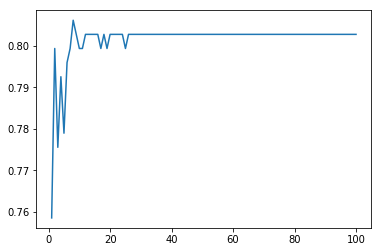

In [0]:
plot(range(1,101),recall)

# **Implementing Random Forests**

In [0]:
from sklearn import metrics
model_rf = RandomForestClassifier(n_estimators=50, random_state=1) # SK n_estimatores = no. of trees
model_rf.fit(X_train_smote, y_train_smote)
prediction_train = model_rf.predict(X_train_smote)

accuracy_train = metrics.accuracy_score(y_train_smote, prediction_train)
accuracy_train
prediction_test = model_rf.predict(X_test)
accuracy_test = metrics.accuracy_score(y_test, prediction_test)
accuracy_test
metrics.confusion_matrix(y_test, prediction_test)
print(metrics.classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91       236
         1.0       0.70      0.33      0.45        58

    accuracy                           0.84       294
   macro avg       0.78      0.65      0.68       294
weighted avg       0.82      0.84      0.82       294



# **Logistic using Statsmodels.api**

In [0]:
import statsmodels.api as sm


In [0]:
mod = sm.Logit(endog=y_train, exog=X_train)
res = mod.fit(method='bfgs', maxiter=100)
print (res.summary())

         Current function value: 0.305908
         Iterations: 100
         Function evaluations: 116
         Gradient evaluations: 107
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1142
Method:                           MLE   Df Model:                           33
Date:                Sun, 11 Aug 2019   Pseudo R-squ.:                  0.2828
Time:                        20:23:34   Log-Likelihood:                -359.75
converged:                      False   LL-Null:                       -501.59
Covariance Type:            nonrobust   LLR p-value:                 1.217e-41
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Q("Business

/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
